In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import discriminant_analysis
%matplotlib inline
data = pd.read_csv('numeric sequence.csv', sep = ',', engine = 'python')
processed_data = data
for i in range (1, 15):
     processed_data['feature'+str(i)] = data['feature'+str(i*2-1)]*2 + data['feature'+str(i*2)]
to_drop=[]
for i in range (15, 29):
    to_drop.append('feature'+str(i))
processed_data = processed_data.drop(to_drop, 1).drop('label', 1)
processed_data = processed_data.replace(0, 'A')\
                              .replace(1, 'T')\
                              .replace(2, 'C')\
                              .replace(3, 'G')
processed_data = pd.get_dummies(processed_data)
processed_data=pd.concat((processed_data, data['label']), axis = 1)
data = processed_data
X, X_test, y, y_test = train_test_split(data.drop('label', axis=1), data['label'], test_size = 0.1, 
                                                    random_state = 2)

# Extremely randomized trees

## Зависимость ошибок от количества деревьев

In [5]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
est_number = np.arange(1, 100)
ert_model = ensemble.ExtraTreesClassifier()
grid = GridSearchCV(ert_model, param_grid = {'n_estimators': est_number})
grid.fit(X, y)
min_err_cv = 1 - grid.best_score_
argmin_err_cv = grid.best_estimator_.n_estimators
print(min_err_cv)
print("Число деревьев:")
print(argmin_err_cv)

0.164179104478
85


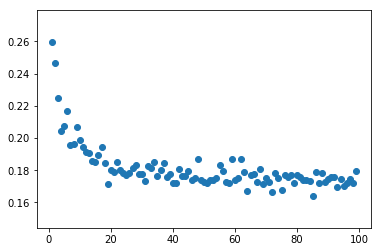

In [6]:
score = 1 - np.array([i for i in grid.cv_results_['mean_test_score']])
depth = np.array([i['n_estimators'] for i in grid.cv_results_['params']])
plt.scatter(depth, score)